In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# from google.colab import drive
# drive.mount('/content/drive')

# import os
# path = "/content/drive/MyDrive/semester 2/AM216/HW2" # Your path here
# os.chdir(path)

# 1. Classifying breast cancer image data with logistic regression

In this problem, you will classify whether cells in the given breast cancer cell image are malignant or benign. There are 58 images and their truth label, which is 1 for malignant and 0 for benign. 

In [2]:
# Load data
data = pickle.load(open('breast_cancer_data.pkl', 'rb'))
train_img = data['train_img']
test_img = data['test_img']
train_lbl = data['train_lbl']
test_lbl = data['test_lbl']

Let's take a quick look at the malignant and benign images.

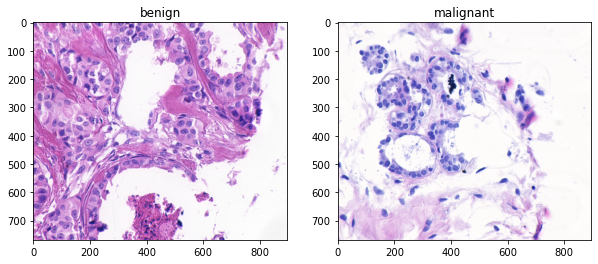

In [3]:
# Visualize images
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].imshow(train_img[0])
ax[0].set_title('benign')
ax[1].imshow(train_img[1])
ax[1].set_title('malignant')
plt.show()

The dimension of this image is $N_{row}$ x $N_{column}$ x 3, where last dimension corresponds to red, gree, and blue channels.

In [4]:
train_img[0].shape

(768, 896, 3)

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler 
import sklearn.metrics 
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, roc_curve, plot_roc_curve

### Problem 1.a - fit a logistic regression model on the image and report:
# - mean accuracy
# - balanced accuracy
# - ROC curve with AUC

# on the test set data. You may want to play with different regularization.

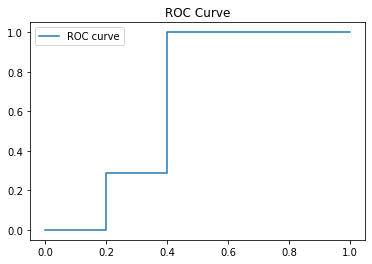

In [23]:
## preprocess data (flattening to a vector)

train_img_reshaped = train_img.reshape(len(train_img), -1) 
test_img_reshaped = test_img.reshape(len(test_img), -1) 

# scale = MinMaxScaler()
# train_img_scale = scale.fit_transform(train_img_reshaped)
# test_img_scale = scale.transform(test_img_reshaped)

## train 
logreg = LogisticRegression(solver = 'lbfgs', penalty = 'l2',random_state = 0)
logreg.fit(train_img_reshaped, train_lbl)
pred = logreg.predict(test_img_reshaped)

## evaluate
mean_acc = accuracy_score(test_lbl, pred)
balance = balanced_accuracy_score(test_lbl, pred)


yhat = logreg.predict_proba(test_img_reshaped)[:,1]
fpr, tpr, thresholds = roc_curve(test_lbl, yhat)
roc_auc = roc_auc_score(test_lbl, yhat)

plt.figure()
plt.title("ROC Curve")
plt.plot(fpr, tpr, label = "ROC curve")
plt.legend()


In [24]:
train_img_reshaped.shape

(46, 2064384)

In [25]:
print("Logistic Regression with Ridge Regularization")
print(f"Mean accuracy: {mean_acc:.4f}\nBalanced accuracy: {balance:.4f}\nROC with AUC score: {roc_auc:.4f}")

Logistic Regression with Ridge Regularization
Mean accuracy: 0.8333
Balanced accuracy: 0.8000
ROC with AUC score: 0.6571


### Problem 1.b - do the above exercise again with downsampled images

In [26]:
print(test_img.shape)
print(test_img[0].shape)


(12, 768, 896, 3)
(768, 896, 3)


In [27]:
## preprocess data
from skimage.measure import block_reduce # you are welcome to use other methods
size = (1,2,2,3)

# down_train = np.zeros((size))
# for i in range(46):
#     down_train[i] = (block_reduce(train_img[i], block_size=(size), func=np.mean))

# down_test = np.zeros((12,768,896,3))
# for i in range(12):
#     down_test[i] = (block_reduce(test_img[i], block_size=(size), func=np.mean))

down_train = block_reduce(train_img, block_size=size, func = np.mean)
down_test = block_reduce(test_img, block_size=size, func = np.mean)

#


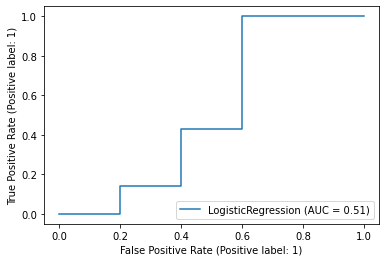

In [28]:
#reshaping
train_img_reshaped = down_train.reshape(len(train_img), -1) 
test_img_reshaped = down_test.reshape(len(test_img), -1) 

# scale = MinMaxScaler()
# train_img_scale = scale.fit_transform(train_img_reshaped)
# test_img_scale = scale.transform(test_img_reshaped)

## train 
logreg = LogisticRegression(solver = 'lbfgs', penalty = 'l2', max_iter=1000)
logreg.fit(train_img_reshaped, train_lbl)
pred = logreg.predict(test_img_reshaped)

## evaluate
mean_acc = accuracy_score(test_lbl, pred)
balance = balanced_accuracy_score(test_lbl, pred)
yhat = logreg.predict_proba(test_img_reshaped)[:,1]
roc_auc = roc_auc_score(test_lbl, yhat)
plot_roc_curve(logreg,test_img_reshaped, test_lbl)
plt.show()



In [29]:
print("Down Sampling Preprocessing")
print(f"Mean accuracy: {mean_acc}\nBalanced accuracy: {balance}\nROC with AUC score: {roc_auc}")

Down Sampling Preprocessing
Mean accuracy: 0.4166666666666667
Balanced accuracy: 0.41428571428571426
ROC with AUC score: 0.5142857142857142


### Problem 1.c - ...and again with top principle components

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [14]:
## preprocess data
pca = PCA(0.95)
train_reshape = train_img.reshape(len(train_img), -1) 
test_reshape = test_img.reshape(len(test_img), -1) 

scale = StandardScaler()
train_scale = scale.fit_transform(train_reshape)
test_scale = scale.transform(test_reshape)


In [15]:
train_lbl_array = np.array(train_lbl)
test_lbl_array = np.array(test_lbl)

In [16]:
print(train_reshape.shape)
print(train_lbl_array.shape)

(46, 2064384)
(46,)


In [17]:
## train 
pca.fit(train_scale)
print(pca.n_components_)

train_pca = pca.transform(train_scale)
test_pca = pca.transform(test_scale)
print(train_pca.shape, test_pca.shape)

41
(46, 41) (12, 41)


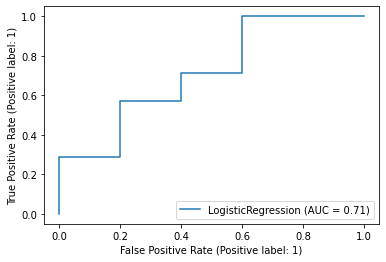

In [18]:
## evaluate
logreg = LogisticRegression(solver = 'lbfgs', max_iter=1000)
logreg.fit(train_pca, train_lbl_array)
pred = logreg.predict(test_pca)

## evaluate
mean_acc = accuracy_score(test_lbl_array, pred)
balance = balanced_accuracy_score(test_lbl_array, pred)
yhat = logreg.predict_proba(test_pca)[:,1]
roc_auc = roc_auc_score(test_lbl_array, yhat)
plot_roc_curve(logreg,test_pca, test_lbl)
plt.show()


In [19]:
print(f"Mean accuracy: {mean_acc:.4f}\nBalanced accuracy: {balance:.4f}\nROC with AUC score: {roc_auc:.4f}")

Mean accuracy: 0.5833
Balanced accuracy: 0.5571
ROC with AUC score: 0.7143


### Problem 1.d - show scatter plots of top 2 principle components for both malignant and benign train set images.

Text(0.5, 0, 'Principal component 2')

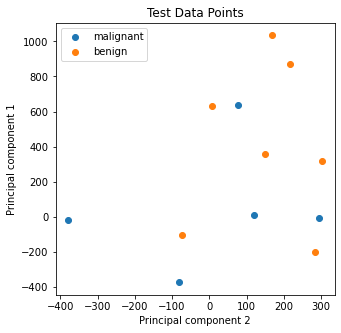

In [20]:
# plot the data as a function of first two principal components
# 1 for malignant and 0 for benign

plt.figure(figsize=(5,5))

for i in range(12):
    plt.scatter(test_pca[test_lbl_array==i,1],test_pca[test_lbl_array==i,0])
plt.legend(['malignant', 'benign'])
plt.title("Test Data Points")
plt.ylabel("Principal component 1")
plt.xlabel("Principal component 2")

Text(0.5, 0, 'Principal component 2')

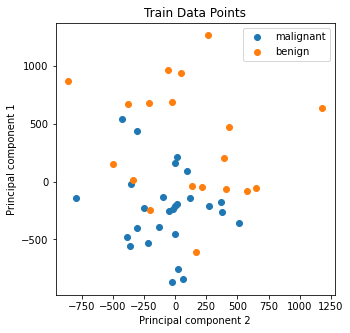

In [21]:
plt.figure(figsize=(5,5))

for i in range(len(train_pca)):
    plt.scatter(train_pca[train_lbl_array==i,1],train_pca[train_lbl_array==i,0])
plt.legend(['malignant', 'benign'])
plt.title("Train Data Points")
plt.ylabel("Principal component 1")
plt.xlabel("Principal component 2")

### Problem 1.e - Discuss what you have learned !
(e.g., does regularization or data processing steps affect classification result? What does the scatter plot of 1.d inform you about this classification task?)

In [30]:
train_img_reshaped = train_img.reshape(len(train_img), -1) 
test_img_reshaped = test_img.reshape(len(test_img), -1) 

# scale = MinMaxScaler()
# train_img_scale = scale.fit_transform(train_img_reshaped)
# test_img_scale = scale.transform(test_img_reshaped)

## train 
logreg = LogisticRegression(solver = 'lbfgs', penalty = "none")
logreg.fit(train_img_reshaped, train_lbl)
pred = logreg.predict(test_img_reshaped)

## evaluate
mean_acc = accuracy_score(test_lbl, pred)
balance = balanced_accuracy_score(test_lbl, pred)
yhat = logreg.predict_proba(test_img_reshaped)[:,1]
roc_auc = roc_auc_score(test_lbl, yhat)
print("No Regularization")
print(f"Mean accuracy: {mean_acc}\nBalanced accuracy: {balance}\nROC with AUC score: {roc_auc}")

No Regularization
Mean accuracy: 0.8333333333333334
Balanced accuracy: 0.8
ROC with AUC score: 0.6571428571428571


## Interpretation 
The models that did the best were Logistic Regressions. The No penalty/regularization performed similar to the one with an L2 loss for the mean accuracy, balanced accuracy, and AUC score. The down sampling was tested with multiple block sizes but it continued to do the worst out of the four models with accuracies around 0.4 and auc around 0.5. I imagine this is because down sampling reduces the spatial resolution, so the model potentially cannot pick up on differences between the malignant and benign as easily anymore. PCA had the highest AUC at around 0.7 but had accuracies around 0.55. The accuracies could be done because we also are not using the full image but about 95% variance. The AUC tell us how well the model is able to identify the classifiers. This means that the model using PCA data is able to distinguish the best between benign and malignant, meaning the tradeoff between false positives and false negatives are low. 

The scatter plot shows us that there is no clear boundary classifer between benign and malignant in our data. This can be seen how some of the different classifed points actually overlap each other. This makes sense as to why the ROCs are typically not super high. I am shocked that the accuracy is so high but maybe we need to plot more than 2 principal components to get a full picture of what is happening with the data.